#Praktikum 1

In [ ]:
# import library
import numpy as np   #melalukan import library numpy
import matplotlib.pyplot as plt #melakukan import library matplotlib
from scipy import stats
import seaborn as sns #melakukan import library seaborn

##Create Data Dummy

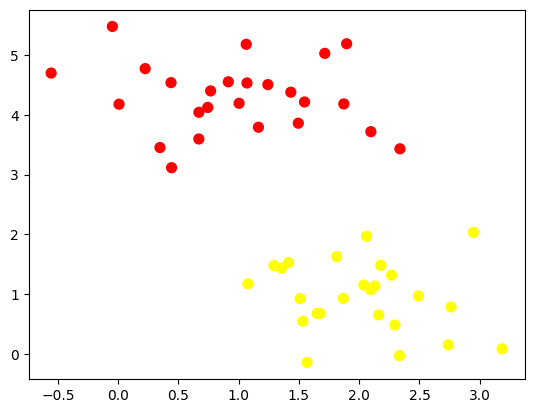

In [ ]:
from sklearn.datasets import make_blobs #melakukan import fungsi make_blods dari library sklearn

# membuat data dummy
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

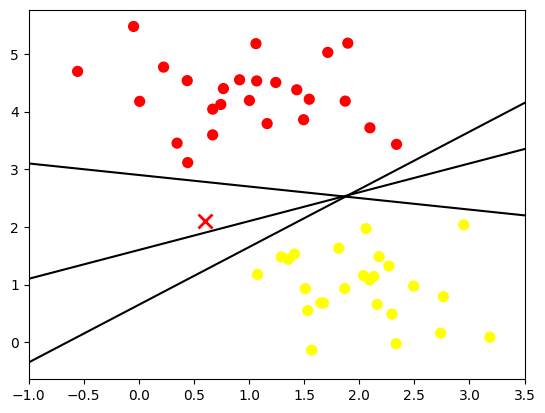

In [ ]:
xfit = np.linspace(-1, 3.5) #Membuat array xfit dengan fungsi linspace(rentang -1 hingga 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') #membuat diagram sebar dengan plot scartter
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10) #menggambar tand X merah di titik (0.6, 2.1)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]: #loop untuk menggambar tiga garis denga kemiringan m dan intercept, denga rumus y = mx + b
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

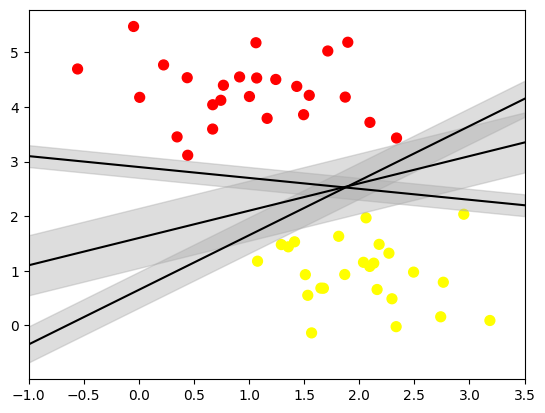

In [ ]:
xfit = np.linspace(-1, 3.5) #membuat array xfit yang terdiri dari nilai-nilai di antara -1 dan 3.5
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') #Menggambar diagram sebar scatter plot

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]: #Loop untuk menggambar 3 garis
    yfit = m * xfit + b #rumus untuk menghitung nilai yfit berdasarkan nilai xfit, m, dan b
    plt.plot(xfit, yfit, '-k') #Menggambar garis dengan warna hitam ('-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4) #Fungsi ini menambahkan area bayangan (shaded region) di sekitar garis yfit

plt.xlim(-1, 3.5) #mengatur batas sumbu x dari -1 hingga 3.5

##Penerapan Fitting SVM

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10) #membuat objek svc dengan parameter model kernel linier
model.fit(X, y) #melatih model SVC menggunakan data X (fitur) dan y (label atau kategori).

SVC(C=10000000000.0, kernel='linear')

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

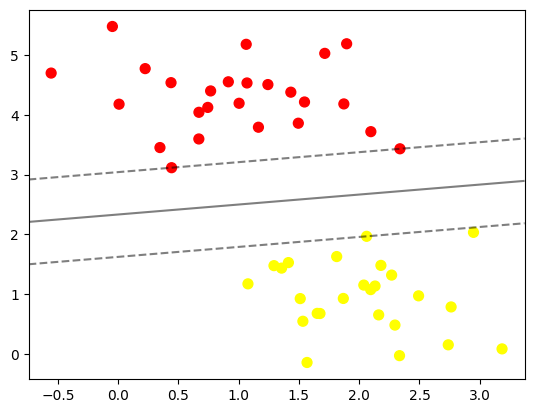

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') #membuat scatter plot
plot_svc_decision_function(model) #menggambar decision boundary dari model SVC yang sudah dilatih.

In [ ]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

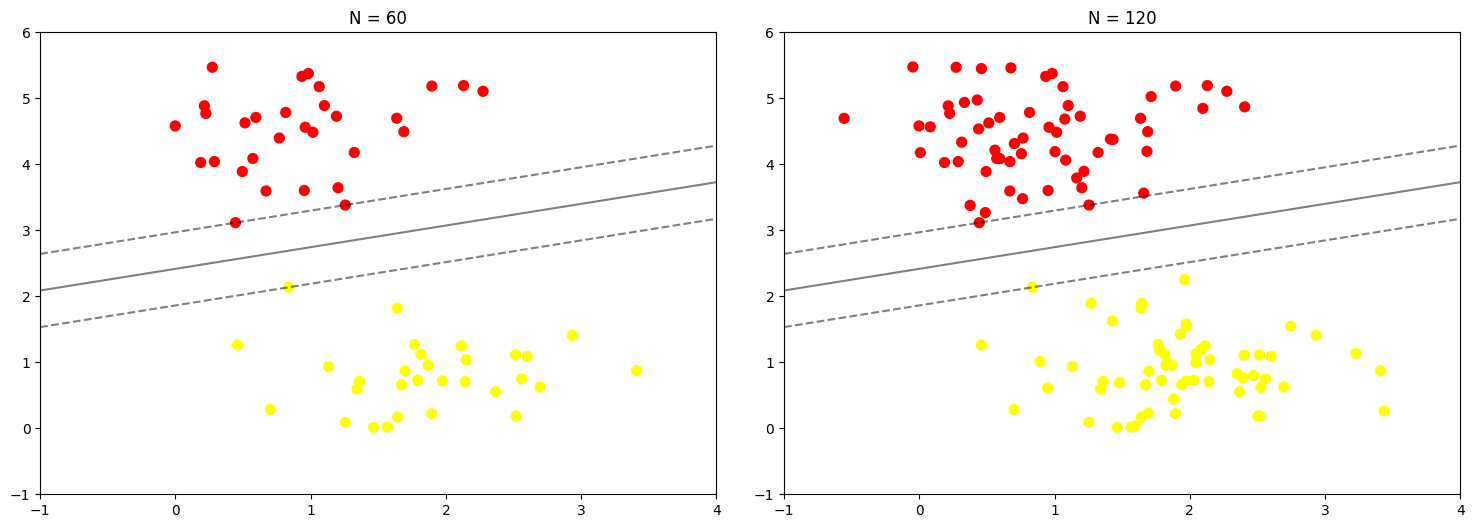

In [ ]:
#Fungsi ini digunakan untuk melatih model SVM pada data dengan ukuran tertentu
#dan menampilkan scatter plot serta decision boundary.
def plot_svm(N=10, ax=None):
   #menghasilkan dataset buatan dengan 200 sampel yang dikelompokkan menjadi 2 cluster.
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    #Memilih subset dari data X dan label y, dengan ukuran N yang ditentukan sebagai parameter input untuk fungsi.
    X = X[:N]
    y = y[:N]
    #Membuat model SVC dengan kernel linear
    model = SVC(kernel='linear', C=1E10)
    #Melatih model SVM menggunakan data X dan y
    model.fit(X, y)

    ax = ax or plt.gca() #Memastikan bahwa plot akan menggunakan objek ax (axes)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') #Membuat scatter plot dari data X dengan pewarnaan berdasarkan label y
    #Mengatur batas sumbu x dan y untuk plot.
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

#Membuat Subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
#Loop untuk Memanggil plot_svm
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

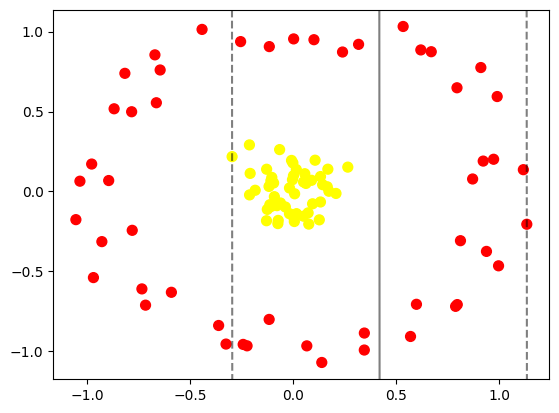

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
#melakukan perhitungan berbasis elemen dari array X
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-1.14921597e-01,  9.06534701e-01],
       [-9.03667896e-02, -3.31915886e-02],
       [ 3.26237967e-03,  9.54738505e-01],
       [ 2.08833939e-01, -1.29431612e-02],
       [ 1.07467498e-01,  1.95228734e-01],
       [-1.06257510e-01, -9.46892439e-02],
       [ 5.73481165e-02,  1.10552456e-01],
       [-6.44824805e-01,  7.60160811e-01],
       [ 1.01838177e-01,  9.49727487e-01],
       [ 7.35648668e-02, -1.34603308e-01],
       [-8.94627035e-01,  6.78972388e-02],
       [-6.47881061e-02,  2.61621633e-01],
       [ 8.13140390e-01, -3.08743967e-01],
       [ 1.69365465e-01,  1.38934186e-01],
       [ 9.39352561e-01, -3.75843899e-01],
       [-9.27760858e-01, -3.14621285e-01],
       [ 1.13515633e+00, -2.05747825e-01],
       [-7.83196454e-01,  4.98643669e-01],
       [ 8.72125088e-01,  7.76293258e-02],
       [-1.02728123e-01,  8.75589102e-02],
       [-3.68955065e-02, -9.77730988e-02],
       [-2.54168237e-01,  9.37826948e-01],
       [ 6.30430084e-02,  4.97818094e-02],
       [ 3.46526496e-01, -8.87046794e-01],
       [ 7.89478663e-01, -7.19852712e-01],
       [-2.95520932e-01,  2.17666434e-01],
       [ 5.12152069e-02,  5.90095093e-02],
       [ 9.23534626e-01,  1.89699626e-01],
       [-1.16225504e-01,  3.11478603e-02],
       [ 1.33435311e-01, -6.63569938e-02],
       [-2.11388173e-01,  2.91085389e-01],
       [ 1.33657677e-01,  9.28728865e-02],
       [ 7.98558990e-03, -1.49899627e-02],
       [-7.32807433e-02, -2.01680064e-01],
       [-2.41765991e-01, -9.58180073e-01],
       [ 5.99437874e-01, -7.07037710e-01],
       [-9.39759574e-02,  5.27118073e-02],
       [-7.77388162e-02, -8.93867234e-02],
       [-1.24581392e-01, -1.12664860e-01],
       [-1.68756695e-02,  2.12887695e-02],
       [-2.07837443e-01,  1.12624793e-01],
       [ 9.12055061e-01,  7.75428708e-01],
       [-1.05385104e+00, -1.76936399e-01],
       [-1.83451122e-01,  7.01789290e-03],
       [ 1.71554711e-02, -1.39529275e-01],
       [-6.63251599e-01,  5.54973726e-01],
       [-8.16038238e-01,  7.39178893e-01],
       [ 3.46265889e-01, -9.93411244e-01],
       [-8.68291465e-01,  5.17168352e-01],
       [ 5.70662234e-01, -9.08489687e-01],
       [-7.16532138e-02, -1.81727612e-01],
       [-7.33399518e-01, -6.10625136e-01],
       [ 5.65661530e-03, -1.68381813e-01],
       [-4.41350152e-01,  1.01418608e+00],
       [ 2.66193441e-01,  1.51857800e-01],
       [ 1.62719857e-02,  1.36850866e-01],
       [-2.55901758e-03,  7.31560208e-02],
       [-1.70389779e-02, -1.39608267e-01],
       [-1.27855190e-01,  1.38617726e-01],
       [-6.06796453e-02, -7.26809553e-02],
       [ 1.27798420e-01, -1.78235260e-01],
       [-9.77213966e-01,  1.71152550e-01],
       [-6.70195885e-01,  8.54876137e-01],
       [-2.10784271e-01, -2.20298847e-02],
       [-7.80376704e-01, -2.43799551e-01],
       [ 3.18483474e-01,  9.20681812e-01],
       [-1.12316430e-01, -8.35796000e-02],
       [-7.15707558e-01, -7.12377153e-01],
       [ 6.71237498e-01,  8.74506095e-01],
       [ 7.97567820e-01, -7.08794846e-01],
       [-1.15634730e-01, -8.01725114e-01],
       [ 6.61841212e-03, -1.88701629e-01],
       [ 7.66660351e-02, -2.04900976e-01],
       [ 9.98023714e-01, -4.66048553e-01],
       [ 9.01239124e-02,  6.93399819e-02],
       [-1.28572798e-01, -1.83718244e-01],
       [ 2.40588125e-01,  8.72628417e-01],
       [ 2.35336810e-03,  9.80410441e-02],
       [-1.03430382e+00,  6.38180510e-02],
       [ 5.11384284e-02, -1.55306273e-01],
       [ 9.74062594e-01,  2.01142153e-01],
       [-1.07260458e-01,  6.62447315e-02],
       [ 9.91343332e-01,  5.93873900e-01],
       [-9.68710681e-01, -5.39764253e-01],
       [ 1.43911182e-01,  4.20479731e-02],
       [ 9.51306749e-02, -7.76828789e-02],
       [ 5.34834524e-01,  1.03254499e+00],
       [-3.60909839e-01, -8.39665153e-01],
       [ 1.39887857e-01, -1.07130225e+00],
       [-7.07222223e-03,  1.93850091e-01],
       [-3.25041596e-01, -9.56011086e-01],
       [-5.90244267e-01, -6.31873762e-01

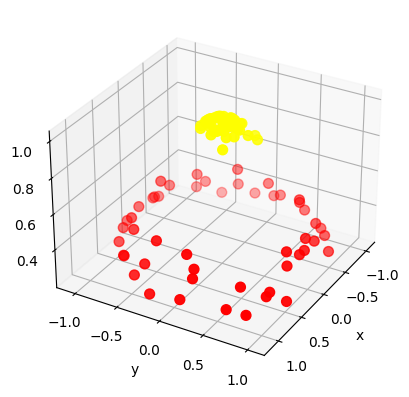

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed


def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')


interact(plot_3D, elev=[-90, 45, 30, 20, 10], azim=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-1.14921597e-01,  9.06534701e-01],
       [-9.03667896e-02, -3.31915886e-02],
       [ 3.26237967e-03,  9.54738505e-01],
       [ 2.08833939e-01, -1.29431612e-02],
       [ 1.07467498e-01,  1.95228734e-01],
       [-1.06257510e-01, -9.46892439e-02],
       [ 5.73481165e-02,  1.10552456e-01],
       [-6.44824805e-01,  7.60160811e-01],
       [ 1.01838177e-01,  9.49727487e-01],
       [ 7.35648668e-02, -1.34603308e-01],
       [-8.94627035e-01,  6.78972388e-02],
       [-6.47881061e-02,  2.61621633e-01],
       [ 8.13140390e-01, -3.08743967e-01],
       [ 1.69365465e-01,  1.38934186e-01],
       [ 9.39352561e-01, -3.75843899e-01],
       [-9.27760858e-01, -3.14621285e-01],
       [ 1.13515633e+00, -2.05747825e-01],
       [-7.83196454e-01,  4.98643669e-01],
       [ 8.72125088e-01,  7.76293258e-02],
       [-1.02728123e-01,  8.75589102e-02],
       [-3.68955065e-02, -9.77730988e-02],
       [-2.54168237e-01,  9.37826948e-01],
       [ 6.30430084e-02,  4.97818094e-02],
       [ 3.46526496e-01, -8.87046794e-01],
       [ 7.89478663e-01, -7.19852712e-01],
       [-2.95520932e-01,  2.17666434e-01],
       [ 5.12152069e-02,  5.90095093e-02],
       [ 9.23534626e-01,  1.89699626e-01],
       [-1.16225504e-01,  3.11478603e-02],
       [ 1.33435311e-01, -6.63569938e-02],
       [-2.11388173e-01,  2.91085389e-01],
       [ 1.33657677e-01,  9.28728865e-02],
       [ 7.98558990e-03, -1.49899627e-02],
       [-7.32807433e-02, -2.01680064e-01],
       [-2.41765991e-01, -9.58180073e-01],
       [ 5.99437874e-01, -7.07037710e-01],
       [-9.39759574e-02,  5.27118073e-02],
       [-7.77388162e-02, -8.93867234e-02],
       [-1.24581392e-01, -1.12664860e-01],
       [-1.68756695e-02,  2.12887695e-02],
       [-2.07837443e-01,  1.12624793e-01],
       [ 9.12055061e-01,  7.75428708e-01],
       [-1.05385104e+00, -1.76936399e-01],
       [-1.83451122e-01,  7.01789290e-03],
       [ 1.71554711e-02, -1.39529275e-01],
       [-6.63251599e-01,  5.54973726e-01],
       [-8.16038238e-01,  7.39178893e-01],
       [ 3.46265889e-01, -9.93411244e-01],
       [-8.68291465e-01,  5.17168352e-01],
       [ 5.70662234e-01, -9.08489687e-01],
       [-7.16532138e-02, -1.81727612e-01],
       [-7.33399518e-01, -6.10625136e-01],
       [ 5.65661530e-03, -1.68381813e-01],
       [-4.41350152e-01,  1.01418608e+00],
       [ 2.66193441e-01,  1.51857800e-01],
       [ 1.62719857e-02,  1.36850866e-01],
       [-2.55901758e-03,  7.31560208e-02],
       [-1.70389779e-02, -1.39608267e-01],
       [-1.27855190e-01,  1.38617726e-01],
       [-6.06796453e-02, -7.26809553e-02],
       [ 1.27798420e-01, -1.78235260e-01],
       [-9.77213966e-01,  1.71152550e-01],
       [-6.70195885e-01,  8.54876137e-01],
       [-2.10784271e-01, -2.20298847e-02],
       [-7.80376704e-01, -2.43799551e-01],
       [ 3.18483474e-01,  9.20681812e-01],
       [-1.12316430e-01, -8.35796000e-02],
       [-7.15707558e-01, -7.12377153e-01],
       [ 6.71237498e-01,  8.74506095e-01],
       [ 7.97567820e-01, -7.08794846e-01],
       [-1.15634730e-01, -8.01725114e-01],
       [ 6.61841212e-03, -1.88701629e-01],
       [ 7.66660351e-02, -2.04900976e-01],
       [ 9.98023714e-01, -4.66048553e-01],
       [ 9.01239124e-02,  6.93399819e-02],
       [-1.28572798e-01, -1.83718244e-01],
       [ 2.40588125e-01,  8.72628417e-01],
       [ 2.35336810e-03,  9.80410441e-02],
       [-1.03430382e+00,  6.38180510e-02],
       [ 5.11384284e-02, -1.55306273e-01],
       [ 9.74062594e-01,  2.01142153e-01],
       [-1.07260458e-01,  6.62447315e-02],
       [ 9.91343332e-01,  5.93873900e-01],
       [-9.68710681e-01, -5.39764253e-01],
       [ 1.43911182e-01,  4.20479731e-02],
       [ 9.51306749e-02, -7.76828789e-02],
       [ 5.34834524e-01,  1.03254499e+00],
       [-3.60909839e-01, -8.39665153e-01],
       [ 1.39887857e-01, -1.07130225e+00],
       [-7.07222223e-03,  1.93850091e-01],
       [-3.25041596e-01, -9.56011086e-01],
       [-5.90244267e-01, -6.31873762e-01

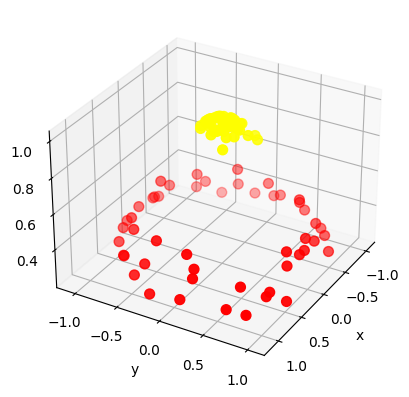

In [ ]:
interact(plot_3D, elev=[-90, 45, 30, 20, 10], azim=(-180, 180), X=fixed(X), y=fixed(y))


In [ ]:
clf = SVC(kernel='rbf', C=1E6) #import model svc dengan tipe rbf
clf.fit(X, y) #train model

SVC(C=1000000.0)

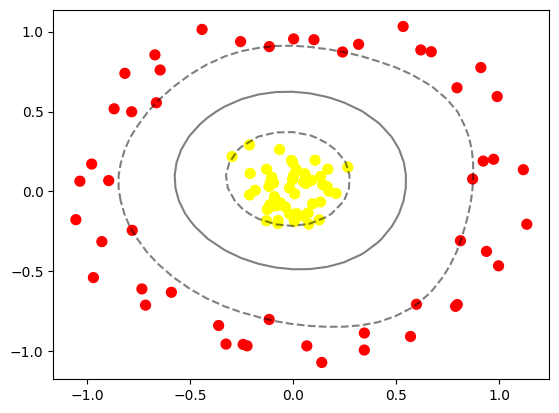

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

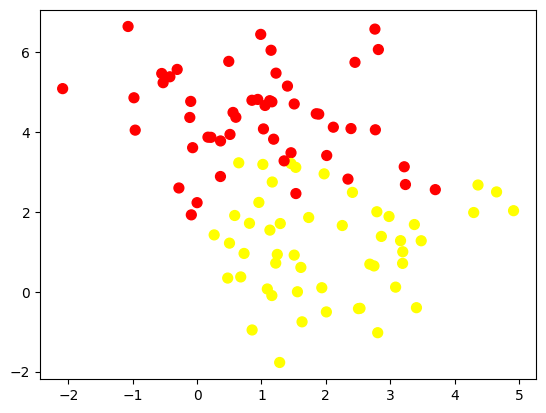

In [ ]:
## Data Overlap

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');


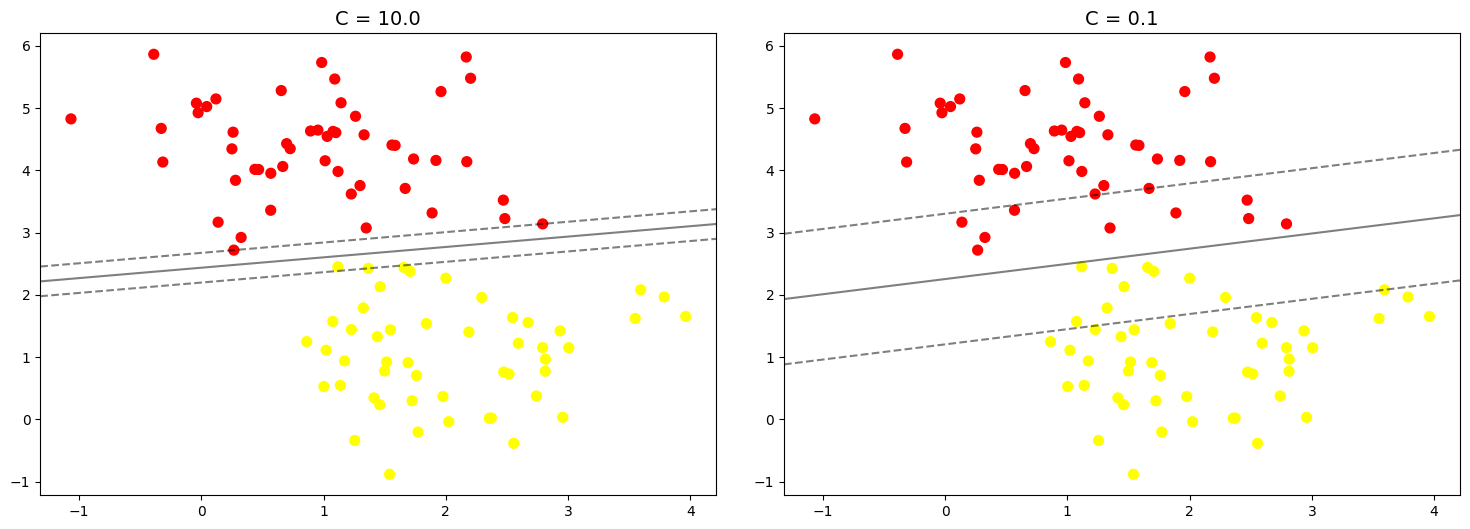

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)

#Praktikum 2

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


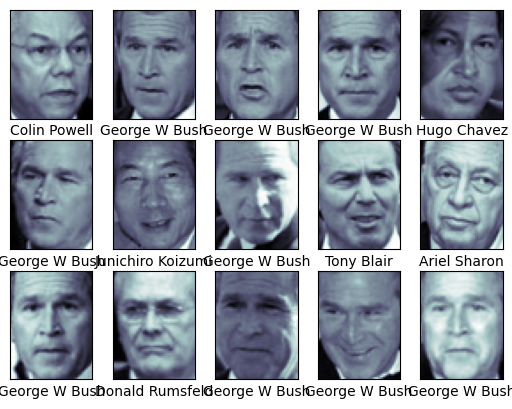

In [ ]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])


In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 32s, sys: 25.4 s, total: 1min 57s
Wall time: 1min 16s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)


Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

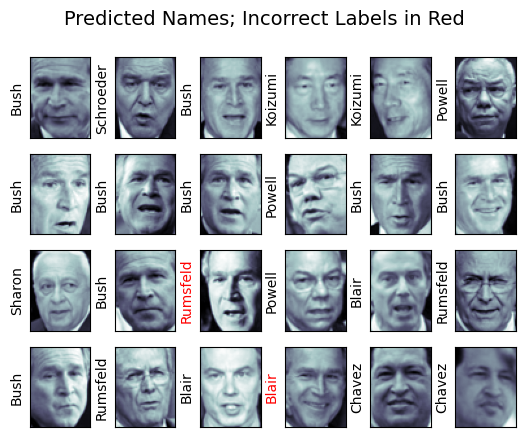

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

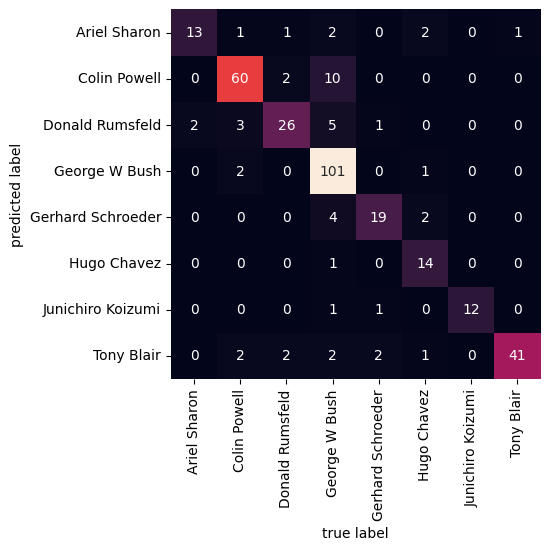

In [ ]:
# bentuk confusion matrix
import seaborn as sns

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

#Praktikum 3

In [ ]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[ 61  49]
 [130  17]
 [145  36]
 [139  28]
 [146  28]
 [270 211]
 [129   3]
 [191  71]
 [ 57  87]
 [210  59]
 [  8 237]
 [131  32]
 [173 101]
 [104 125]
 [174  36]
 [120  91]
 [100  39]
 [ 20 174]
 [ 53 135]
 [ 64  79]
 [ 84 122]
 [ 78  80]
 [ 51 137]
 [114 266]
 [213   5]
 [140  85]
 [100  75]
 [121  46]
 [105 137]
 [183  96]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [ ]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,61,49,0
1,130,17,0
2,145,36,0
3,139,28,0
4,146,28,0


In [ ]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,61,49,Kelas B
1,130,17,Kelas B
2,145,36,Kelas B
3,139,28,Kelas B
4,146,28,Kelas B


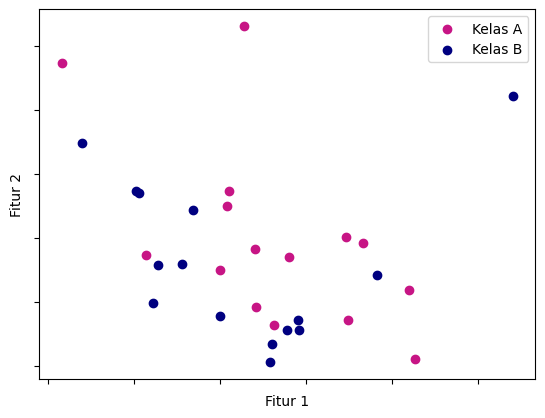

In [ ]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group(('Kelas A',))
class_b = gb.get_group(('Kelas B',))

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.6190476190476191
Hasil akurasi data test: 0.3333333333333333


In [ ]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6190476190476191
Hasil akurasi data test (Gaussian): 0.2222222222222222


#Praktikum 4


In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

#df = pd.read_csv('spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

#df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()


,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#cek Jumlah data per kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


In [ ]:
from hashlib import new
#data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X = df['SMS'].values
y = df['Labels'].values


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

#fitting dan transform X_tran dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
X_test = bow.transform(X_test)

# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh Count

In [ ]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


#Praktikum 5

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [ ]:
train_dir = Path('/content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/images/training')
test_dir = Path('/content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/images/test')

##Langkah 1 - Load Data dan Visualisasikan

In [ ]:
def load_dataset(img_dir):
  p = Path(img_dir)
  dirs = p.glob('*')

  img_list = []

  for dir in dirs :
    print(f"Checking directory: {dir}")  # Print the current directory
    label = str(dir).split('/')[-1]
    for file in dir.glob('*.jpg'):
      print(f"Found file: {file}")  # Print the found file
      img = mpimg.imread(file)

      if img is not None:
        img_list.append([img, label])
    else:
        print(f"No '.jpg' files found in directory: {dir}") # Print if no jpg files found

  print(f"Total images loaded: {len(img_list)}") # Print the total number of loaded images
  return img_list

In [ ]:
# Load training data
train_img = load_dataset(train_dir)

Checking directory: /content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/images/training/night
Found file: /content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/images/training/night/20151102_011408.jpg
Found file: /content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/images/training/night/20151101_135513.jpg
Found file: /content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/images/training/night/20151101_132459.jpg
Found file: /content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/images/training/night/20151101_125509.jpg
Found file: /content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/images/training/night/20151101_122510.jpg
Found file: /content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/images/training/night/20151101_115515.jpg
Found file: /content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/images/training/night/20151101_085511.jpg
Found file: /content/drive/MyDrive/P

In [ ]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

[array([[[4, 5, 7],
         [3, 4, 6],
         [1, 2, 4],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[4, 5, 7],
         [3, 4, 6],
         [2, 3, 5],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[3, 4, 6],
         [3, 4, 6],
         [2, 3, 5],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        ...,
 
        [[0, 1, 0],
         [0, 2, 1],
         [1, 3, 2],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[0, 2, 1],
         [0, 2, 1],
         [1, 3, 2],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[2, 4, 3],
         [2, 4, 3],
         [2, 4, 3],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]], dtype=uint8),
 'night']

In [ ]:

# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 157
(737, 1024, 3)


##Langkah 2 - Pra Pengolahan Data

In [ ]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (700, 1280, 3)
Label	: day


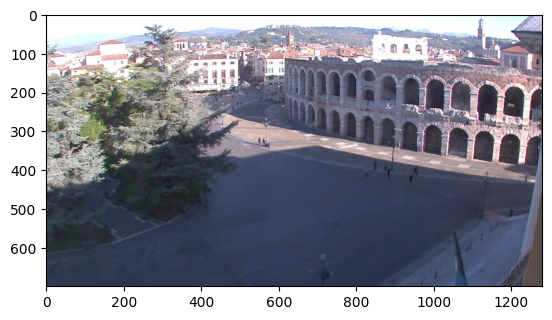

In [ ]:
random_img_viz(train_img)

In [ ]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [ ]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [ ]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [ ]:
train_std_img_list = preprocess(train_img)

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 145
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 0


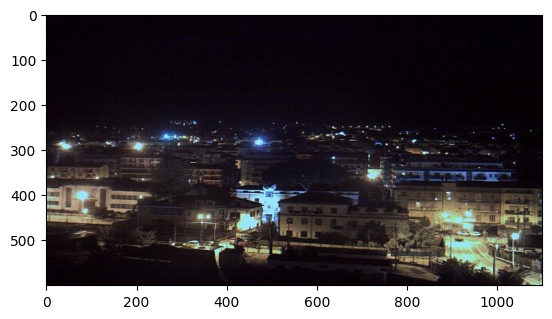

In [ ]:
random_img_viz(train_std_img_list)

##Langkah 3 - Ekstraksi Fitur

In [ ]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 105
Avg Brighness: 48.8694


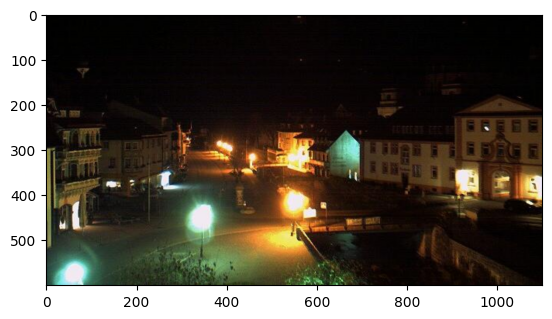

In [ ]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

##Langkah 4 - klasifikasi dengan metode Threshold

In [ ]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 214
Actual label: 1
Predicted label: 0


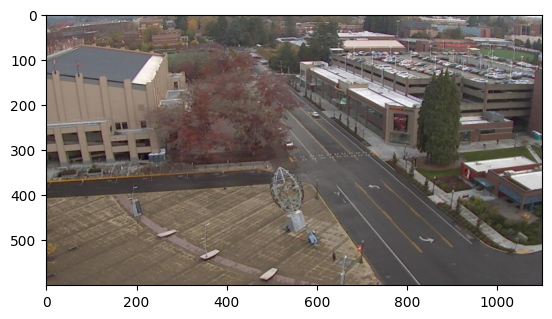

In [ ]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

##Langkah 5 - Evaluasi (Manual)

In [ ]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [ ]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [ ]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Checking directory: /content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/images/test/night
Found file: /content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/images/test/night/20151102_022319.jpg
Found file: /content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/images/test/night/20151102_015324.jpg
Found file: /content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/images/test/night/20151102_021044.jpg
Found file: /content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/images/test/night/20151102_011044.jpg
Found file: /content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/images/test/night/20151102_011134.jpg
Found file: /content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/images/test/night/20151102_012545.jpg
Found file: /content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/images/test/night/20151102_004042.jpg
Found file: /content/drive/MyDrive/Polinema/Semester 5/Machine Learn

##Langkah 4 Alternatif - Membuat Feature Vectors

In [ ]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [ ]:

# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,27.681806,0.0
1,27.820573,0.0
2,25.678615,0.0
3,25.805306,0.0
4,25.731924,0.0


In [ ]:

# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,47.079873,0.0
1,26.358703,0.0
2,89.018533,0.0
3,86.790155,0.0
4,13.765597,0.0


##Lagkah 5 alternatif

In [ ]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

##Langkah 6 alternatif

In [ ]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


#Tugas 1


###1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/voice.csv')

Mounted at /content/drive


In [ ]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df['label'].head()

,label
0,1
1,1
2,1
3,1
4,1


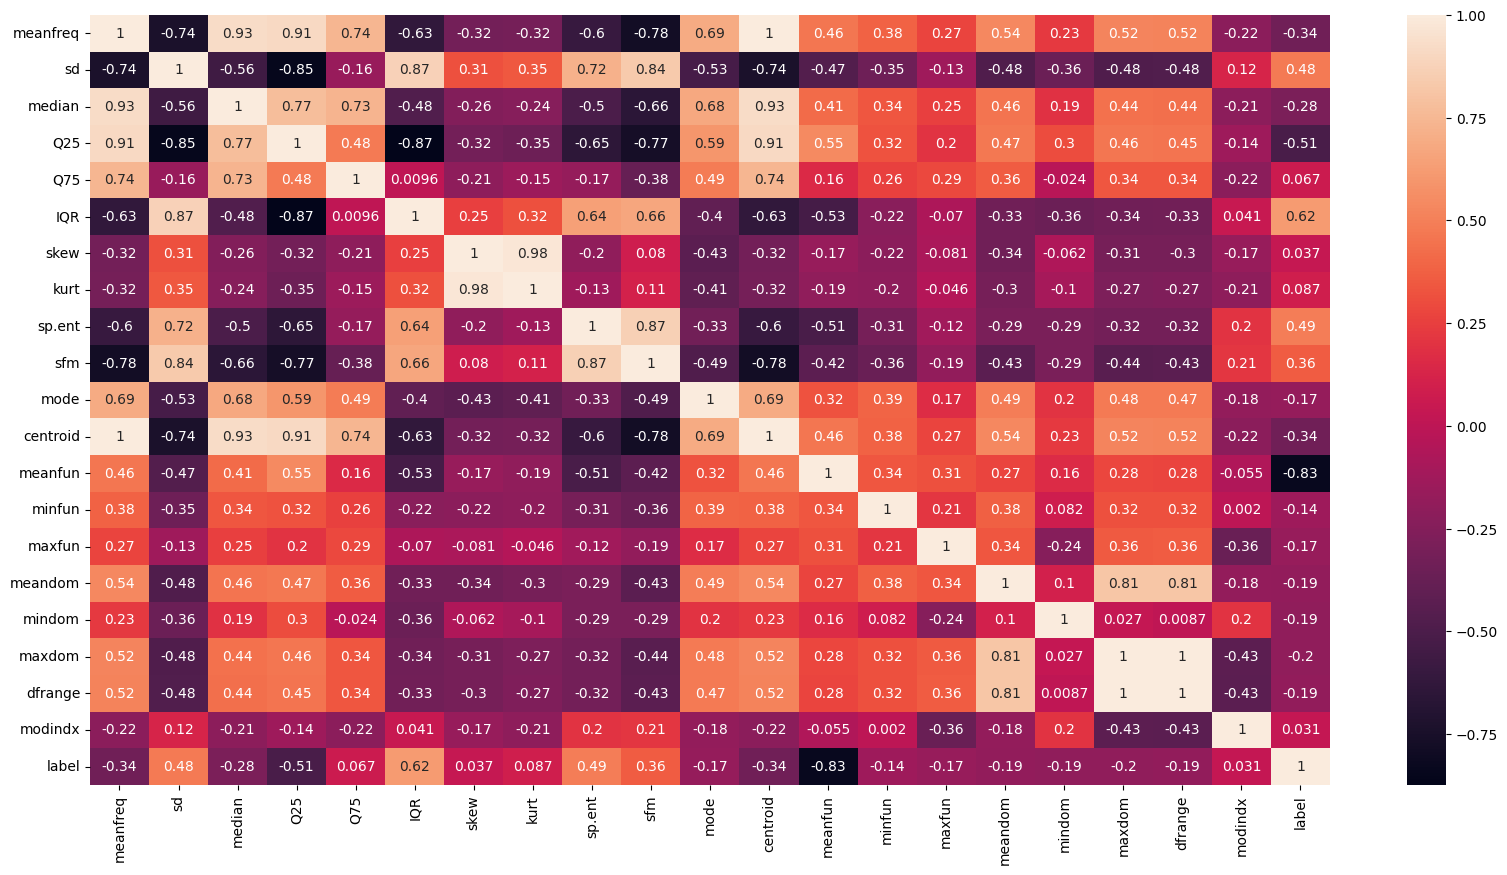

In [ ]:
fig = plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
x = df.drop('label', axis=1)
y = df['label']

In [ ]:
std = StandardScaler()
x = std.fit_transform(x)
x

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
model = SVC(kernel='rbf', C=100)
model.fit(x_train, y_train)

SVC(C=100)

In [ ]:
model.score(x_test, y_test)

from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       318
           1       0.98      0.99      0.98       316

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



###2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
  - Menggunakan data spam.csv
  - Fitur CountVectorizer dengan mengaktifkan stop_words
  - Evaluasi hasilnya

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/spam.csv', encoding='latin-1')
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data = data.drop(data.iloc[:,2:], axis=1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

data = data.rename(columns=new_cols)
data.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data['Labels'] = le.fit_transform(data['Labels'])
data.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X = data['SMS'].values
y = data['Labels'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bow = CountVectorizer(stop_words='english')

X_train = bow.fit_transform(X_train)
X_test = bow.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_bow = mnb.predict(X_train)

# Hasil akurasi data training
acc_train_bow = accuracy_score(y_train, y_train_pred_bow)

# Prediksi dengan data test
y_test_pred_bow = mnb.predict(X_test)

# Hasil akurasi data test
acc_test_bow = accuracy_score(y_test, y_test_pred_bow)

# Laporan klasifikasi
report_bow = classification_report(y_test, y_test_pred_bow)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train_bow *100:.2f}%')
print(f'Hasil akurasi data test: {acc_test_bow *100:.2f}%')

Hasil akurasi data train: 99.46%
Hasil akurasi data test: 98.39%


###3. Buatlah model klasisfikasi multinominal Naiv Bayes dengan ketentuan,
  - menggunakan spam.csv
  - fitur TF-IDF dengan mengaktifkan stop_words
  - evaluasi hasilnya dan bandingkan hasil pada tugas no.2
  - Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tf_idf = TfidfVectorizer(stop_words='english')

X_train = tf_idf.fit_transform(X_train)
X_test = tf_idf.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_tf_idf = mnb.predict(X_train)

# Hasil akurasi data training
acc_train_tf_idf = accuracy_score(y_train, y_train_pred_tf_idf)

# Prediksi dengan data test
y_test_pred_tf_idf = mnb.predict(X_test)

# Hasil akurasi data test
acc_test_tf_idf = accuracy_score(y_test, y_test_pred_tf_idf)

# Laporan klasifikasi
report_tf_idf = classification_report(y_test, y_test_pred_tf_idf)

# Print perbandingan hasil evaluasi
print(f'Hasil akurasi data train menggunakan TF-IDF: {acc_train_tf_idf*100:.2f}%')
print(f'Hasil akurasi data train menggunakan CrossVectorizer: {acc_train_bow*100:.2f}%')
print(f'Hasil akurasi data test menggunakan TF-IDF: {acc_test_tf_idf*100:.2f}%')
print(f'Hasil akurasi data test menggunakan CrossVectorizer: {acc_test_bow*100:.2f}%')

# Print laporan klasifikasi data test
print('\n')
print(f'Laporan klasifikasi data test menggunakan TF-IDF\n {report_tf_idf}\n')
print(f'Laporan klasifikasi data test menggunakan CrossVectorizer\n {report_bow}')

Hasil akurasi data train menggunakan TF-IDF: 98.38%
Hasil akurasi data train menggunakan CrossVectorizer: 99.46%
Hasil akurasi data test menggunakan TF-IDF: 96.68%
Hasil akurasi data test menggunakan CrossVectorizer: 98.39%


Laporan klasifikasi data test menggunakan TF-IDF
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Laporan klasifikasi data test menggunakan CrossVectorizer
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



#Tugas 2
Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.metrics import accuracy_score
import os
from pathlib import Path

In [ ]:
train_dir = Path('/content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/images/training')
test_dir = Path('/content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/images/test')

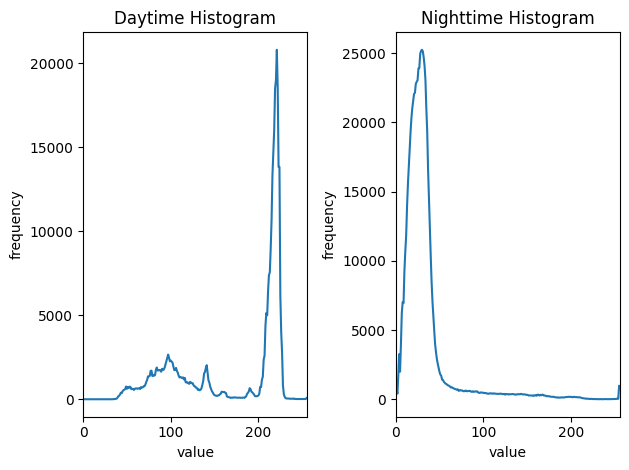

In [ ]:
# Read the image files directly using cv2.imread
day_img = cv2.imread(str(train_dir / 'day/20151101_142050.jpg'))
night_img = cv2.imread(str(train_dir / 'night/20151101_082503.jpg'))

#convert to HSV
day_hsv = cv2.cvtColor(day_img, cv2.COLOR_BGR2HSV) # Changed COLOR_RGB2HSV to COLOR_BGR2HSV
night_hsv = cv2.cvtColor(night_img, cv2.COLOR_BGR2HSV) # Changed COLOR_RGB2HSV to COLOR_BGR2HSV

#convert to HSV
day_hsv = cv2.cvtColor(day_img, cv2.COLOR_RGB2HSV)
night_hsv = cv2.cvtColor(night_img, cv2.COLOR_RGB2HSV)

#extract value chanels
day_v = day_hsv[:,:,2]
night_v = night_hsv[:,:,2]

#calculate histogram
day_his = cv2.calcHist([day_v], [0], None, [256], [0,256])
night_his = cv2.calcHist([night_v], [0], None, [256], [0,256])

#plot histogram
plt.figure()

#daytime image
plt.subplot(1, 2, 1)
plt.title('Daytime Histogram')
plt.xlabel('value')
plt.ylabel('frequency')
plt.plot(day_his)
plt.xlim([0,256])

#nighttime image
plt.subplot(1, 2, 2)
plt.title('Nighttime Histogram')
plt.xlabel('value')
plt.ylabel('frequency')
plt.plot(night_his)
plt.xlim([0,256])

plt.tight_layout()
plt.show()

##Feature Extraction

In [ ]:
def compute_histogram(image):
    # Convert the image to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Compute the histogram (16 bins for each channel)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [16, 16, 16], [0, 180, 0, 256, 0, 256])

    # Normalize the histogram
    cv2.normalize(hist, hist)

    # Flatten the histogram to create the feature vector
    return hist.flatten()

In [ ]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

##Training

In [ ]:
def load_data(directory):
    data = []
    labels = []

    for label in ['day', 'night']:
        path = os.path.join(directory, label)
        for filename in os.listdir(path):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                img_path = os.path.join(path, filename)

                # Read and resize the image
                image = cv2.imread(img_path)
                resized_image = standarized_input(image)

                # Compute histogram features
                hist = compute_histogram(resized_image)

                # Append features and label
                data.append(hist)
                labels.append(0 if label == 'night' else 1)  # 0 for night, 1 for day

    return np.array(data), np.array(labels)

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Create a pipeline that combines PCA and the classifier
pipe = Pipeline(steps=[
    ('pca', PCA()),
    ('svm', SVC)
])

In [ ]:
train_data, train_labels = load_data(train_dir)
test_data, test_labels = load_data(test_dir)

In [ ]:
print(train_data[0])
print(train_labels[0])

type(train_labels)

[2.6046739e-05 2.3442064e-04 2.5395569e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00]
1


numpy.ndarray

In [ ]:
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# Create a pipeline with PCA and SVM
pipe = Pipeline(steps=[
    ('pca', PCA()),
    ('svm', svm.SVC())
])

# Define the parameter grid for GridSearch
param_grid = {
    'pca__n_components': [10, 20, 30, 50, 100, 150],  # Number of PCA components
    'svm__C': [0.1, 1, 10],                 # Regularization parameter for SVM
    'svm__kernel': ['linear', 'rbf']         # Kernel types
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

# Fit the model on training data
grid_search.fit(train_data, train_labels)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'pca__n_components': 20, 'svm__C': 10, 'svm__kernel': 'rbf'}
0.9916666666666666


In [ ]:

# Get the best model from GridSearch
best_model = grid_search.best_estimator_

# Predict on train data
train_predictions = best_model.predict(train_data)
# Predict on test data
test_predictions = best_model.predict(test_data)

# Evaluate accuracy
train_accuracy = accuracy_score(train_labels, train_predictions)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Train Accuracy: 99.58%
Test Accuracy: 100.00%
